In [73]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
from collections import Counter
from operator import itemgetter

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [74]:
def merge_contents(str):
  data=requests.get(f'https://en.wikipedia.org/wiki/{str}').text
  soup = BeautifulSoup(data, features='html.parser')
  content = soup.find('div',id='bodyContent')
  article = content.get_text()
  return article


In [75]:
def tokenize(content):
    content = re.sub(r'https\S+', '', content)
    content = re.sub(r'[^a-zA-Z|\s]', '', content)
    return content

In [76]:
def lower_collection(collection):
    content1 = collection.lower().split()
    return content1

In [77]:
def count_frequency(collection):
    collection= Counter(collection)
    return collection

In [78]:
def print_most_frequent(frequencies, n):
    top_n_values = sorted(frequencies.items(),key=itemgetter(1)  ,reverse=True)
    top_n_values = top_n_values[0:n]
    return top_n_values


In [79]:
def remove_stop_words(collection, stop_words):
    clean = []
    for word in collection:
        if word not in stop_words:
            clean.append(word)
    
    return clean

In [80]:
data = "Ozone_layer"
merge_content = merge_contents(data)
collection = tokenize(merge_content)
collection = lower_collection(collection)
frequencies = count_frequency(collection)
print_most_frequent(frequencies, 10)

stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 
'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
 "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
filtered_collection = remove_stop_words(collection, stop_words)

In [94]:
non_clean=print_most_frequent(frequencies, 20)
non_clean = dict(non_clean)

In [98]:
clean = count_frequency(filtered_collection)
clean = print_most_frequent(clean, 20)
clean = dict(clean)

In [99]:
keys = list(non_clean.keys())
item = list(non_clean.values())

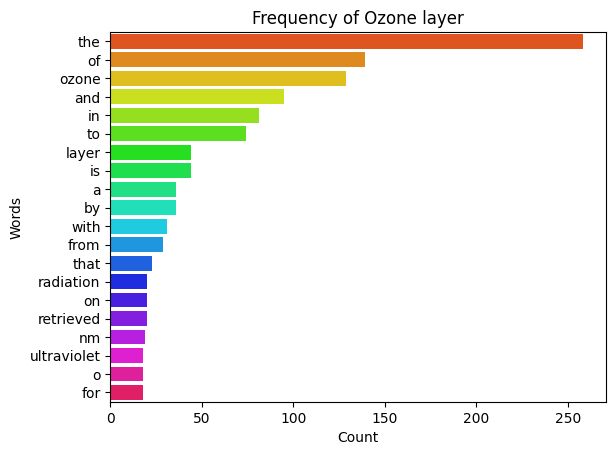

In [100]:
sns.barplot(x=item, y=keys,palette='hsv',legend=False)
plt.title(f"Frequency of {" ".join(data.split('_'))}")
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

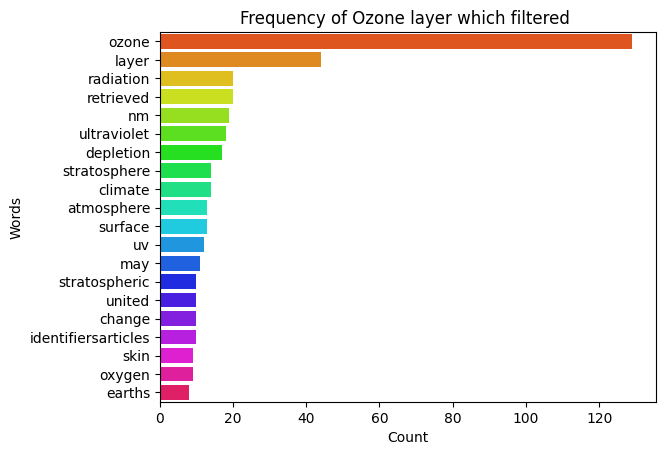

In [102]:
keys = list(clean.keys())
item = list(clean.values())
sns.barplot(x=item, y=keys,palette='hsv',legend=False)
plt.title(f"Frequency of {" ".join(data.split('_'))} which filtered ")
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()